**Part 1: Introduction**

Despite contributing only 4% of global greenhouse gas emissions, Africa faces severe consequences due to global warming. The continent has a low climate resilience score of 27, according to the Henley & Partners index (1), indicating vulnerability, especially in Sahel countries (2). 

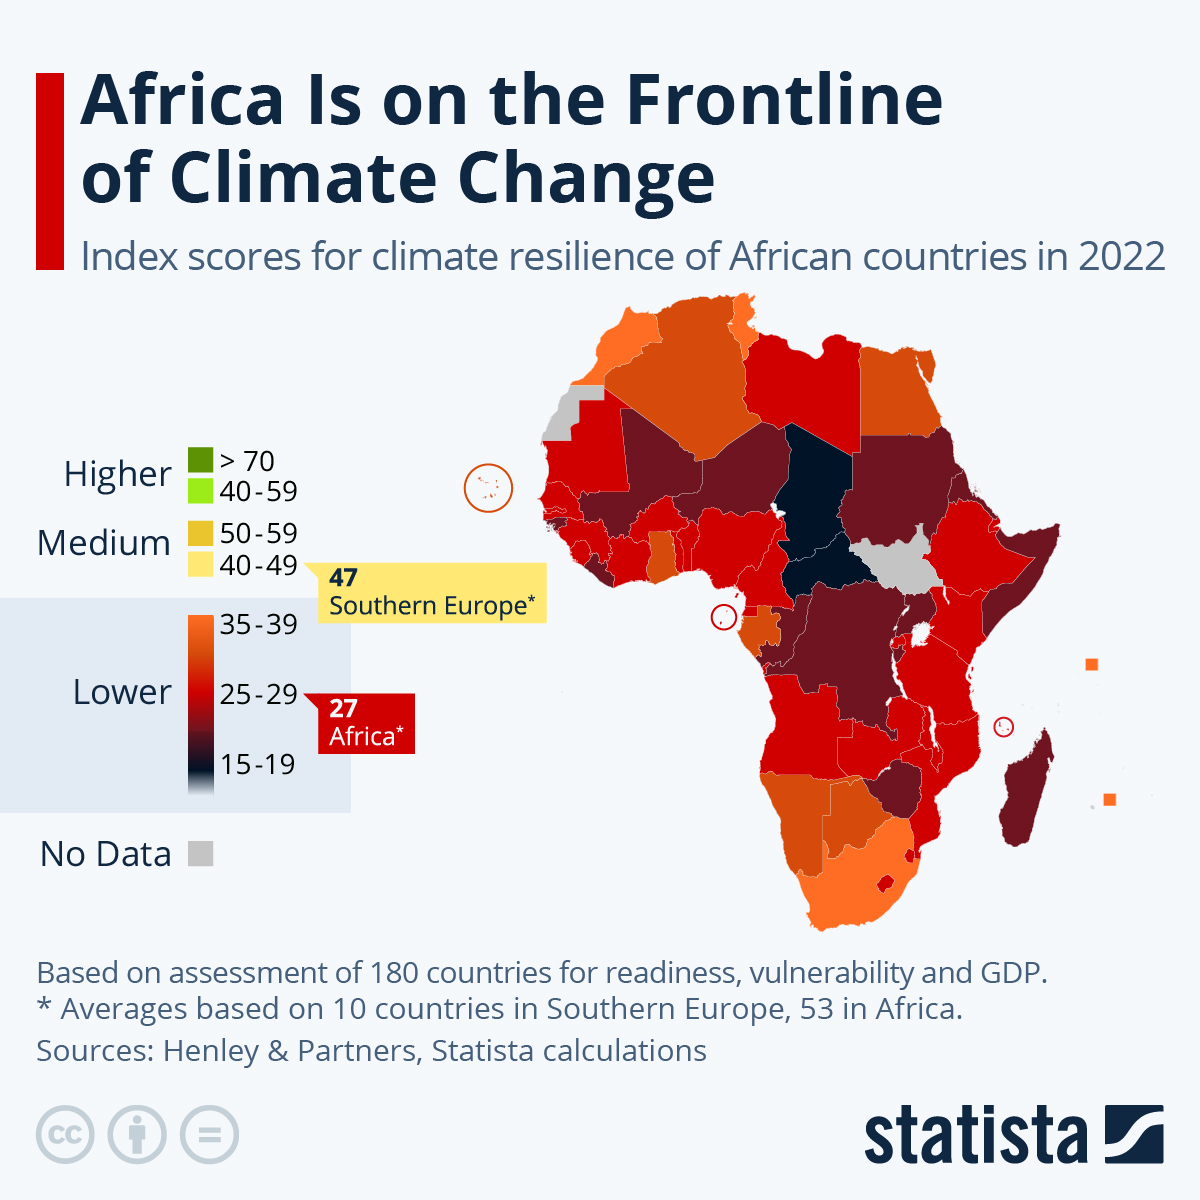

Despite these challenges, Africa possesses significant renewable energy potential, including solar, wind, hydro, geothermal power, and green hydrogen. By tapping into these sustainable resources and focusing on ecosystem restoration, African nations can effectively tackle the climate challenges of the 21st century.

In this project, I attempt to build a model that can reliably predict the output of solar energy from an off-grid photovoltaic cell given various atmospheric conditions and weather parameters 

This project was inspired by the efforts of solar energy companies in Africa, such as M-KOPA Solar of Kenya, to provide electricity to low income earners in rural households (3).

**Part 1.1 Importance of solar energy forecasting for the consumer**

1. Energy Planning and Management:
Predictions allow consumers to plan their energy usage effectively. By knowing how much energy their PV panels are likely to generate, consumers can schedule high-energy activities when the output is at its peak.

2. Optimizing Energy Consumption:
Predictions enable consumers to optimize their energy consumption patterns. They can shift energy-intensive tasks, such as running appliances or charging electric vehicles, to times when solar energy production is high, reducing reliance on grid electricity and saving costs.

3. Budgeting and Cost Savings:
Understanding solar energy output helps consumers estimate their energy savings and budget effectively. By relying more on solar energy, consumers can reduce their electricity bills, leading to long-term cost savings.

4. Environmentally Friendly Practices:
Consumers interested in reducing their carbon footprint can use solar energy predictions to maximize their use of renewable energy sources. This aligns with environmentally friendly practices, contributing to a greener planet.

5. Grid Integration and Energy Independence:
Predictive models aid in grid integration. Consumers can feed excess energy back into the grid when production exceeds consumption, earning credits or payments. This promotes energy independence and resilience.

6. Maintenance and Performance Monitoring:
Predictions help consumers monitor the performance of their PV panels. Sudden drops in energy output might indicate a technical issue that needs maintenance, ensuring the system operates efficiently.

7. Energy Storage Optimization:
For consumers with energy storage systems (such as batteries), accurate predictions assist in optimizing storage. Energy can be stored when production is high and used during periods of low or no sunlight, ensuring a continuous power supply.

8. Supporting Policy and Incentives:
Accurate solar energy predictions provide valuable data for policymakers, grid operators, and utilities. This data can inform policies, incentives, and infrastructure development related to renewable energy.

9. Promoting Sustainable Living:
By actively using and optimizing solar energy, consumers contribute to the global shift toward sustainable living practices, supporting the transition to clean energy sources and reducing reliance on fossil fuels.


**Part 2: Data Preparation**

The features that are used as inputs for the predictive models are various atmospheric variables and weather parameters including (4)(5)(6)(8):

1. Solar Insolation (Solar Irradiance):
Solar insolation represents the amount of sunlight reaching the PV panels. It is a crucial input variable as it directly affects the energy generation.

2. Ambient temperature:
High temperatures can affect the efficiency of PV cells. As the temperature rises, the efficiency of most solar panels decreases. Including temperature data helps adjust the predicted output based on the temperature conditions.

3. Humidity:
Humidity levels can affect the absorption of sunlight. High humidity might lead to diffused sunlight, impacting the solar energy received by the panels.

4. Wind Speed and Direction:
Wind can have cooling effects on PV panels, affecting their temperature and, consequently, their efficiency. Wind direction might also impact shading patterns.

5. Cloud Cover:
Cloud cover significantly affects the amount of solar radiation reaching the PV cells. Cloudy days result in reduced solar energy generation.

6. Precipitation (Rainfall/Snowfall):
Rainfall can affect the cleanliness of PV panels, potentially impacting their efficiency. Snowfall can cover panels, reducing their exposure to sunlight.

7. Air Pressure:
Changes in atmospheric pressure can influence weather patterns, potentially affecting solar energy production.

8. Solar Angle and Azimuth:
Solar angle (elevation angle of the sun) and azimuth angle (compass direction from which the sunlight is coming) are important factors in determining the angle at which sunlight strikes the solar panels. These angles can vary based on the time of day and geographic location.

9. Dew Point:
Dew point is the temperature at which air becomes saturated with moisture, leading to condensation. It can provide insights into humidity levels and potential moisture on PV panels.

10. Time of Day and Date:
The time of day and the date are crucial for understanding the position of the sun in the sky. Solar energy production varies based on the time of day and season.

**Part 2.1: Data Collection**

The dataset (9) collected for this project was sourced from Kaggle[](https://www.kaggle.com/datasets/saurabhshahane/northern-hemisphere-horizontal-photovoltaic), but the original collectors are Williams and Wagner, 2019. The data was collected by the authors to work on the paper, "Machine Learning Modeling of Horizontal Photovoltaics Using Weather and Location Data". The paper was published in the Journal of Renewable Energy

The dataset contains power output from horizontal photovoltaic panels located at 12 Northern hemisphere sites over 14 months. Independent variables in each column include: location, date, time sampled, latitude, longitude, altitude, year and month, month, hour, season, humidity, ambient temperature, power output from the solar panel, wind speed, visibility, pressure, and cloud ceiling.

In [1]:
# Import the Pandas library
import pandas as pd

# Define path
data_path = '/kaggle/input/horizontal-photovoltaic-power-output-data/Photovoltaic Power Output Data.csv'

# Import/load data into a newly created dataframe, df
df = pd.read_csv(data_path)

# Verify the shape of data
df.shape

(21045, 17)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       21045 non-null  object 
 1   Date           21045 non-null  int64  
 2   Time           21045 non-null  int64  
 3   Latitude       21045 non-null  float64
 4   Longitude      21045 non-null  float64
 5   Altitude       21045 non-null  int64  
 6   YRMODAHRMI     21045 non-null  float64
 7   Month          21045 non-null  int64  
 8   Hour           21045 non-null  int64  
 9   Season         21045 non-null  object 
 10  Humidity       21045 non-null  float64
 11  AmbientTemp    21045 non-null  float64
 12  PolyPwr        21045 non-null  float64
 13  Wind.Speed     21045 non-null  int64  
 14  Visibility     21045 non-null  float64
 15  Pressure       21045 non-null  float64
 16  Cloud.Ceiling  21045 non-null  int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 2

In [3]:
df.dtypes.sort_values(ascending=False)

Location          object
Season            object
AmbientTemp      float64
Pressure         float64
Latitude         float64
Longitude        float64
Visibility       float64
YRMODAHRMI       float64
PolyPwr          float64
Humidity         float64
Wind.Speed         int64
Hour               int64
Date               int64
Month              int64
Altitude           int64
Time               int64
Cloud.Ceiling      int64
dtype: object

**Part 2.2 Data Exploration**

In [4]:
# Import the Pandas library
import pandas as pd

# Define a function named 'explore_columns' that takes a dataset path as input
def explore_columns(dataset_path):
    try:
        # Read the dataset into a Pandas DataFrame
        df = pd.read_csv(dataset_path)  # Read the CSV file specified by the 'dataset_path' variable
        
        # Get the list of columns in the dataset
        columns_list = df.columns.tolist()  # Retrieve the column names and convert them to a list
        
        # Print the list of columns
        print("Columns in the dataset:")
        for column in columns_list:
            print(column)  # Print each column name
        
        # Return the list of columns (optional)
        return columns_list  # Return the list of column names if needed
        
    except FileNotFoundError:
        print("File not found. Please check the file path.")  # Handle the case where the file is not found
    except Exception as e:
        print("An error occurred:", e)  # Handle other exceptions and print the error message

# Define the file path of the dataset
dataset_path = '/kaggle/input/horizontal-photovoltaic-power-output-data/Photovoltaic Power Output Data.csv'

# Call the 'explore_columns' function with the specified dataset path and store the returned columns list in 'columns'
columns = explore_columns(dataset_path)  # Call the function to explore the columns in the dataset

Columns in the dataset:
Location
Date
Time
Latitude
Longitude
Altitude
YRMODAHRMI
Month
Hour
Season
Humidity
AmbientTemp
PolyPwr
Wind.Speed
Visibility
Pressure
Cloud.Ceiling


In [5]:
import pandas as pd

# DataFrame is assigned to 'power_data'

# Read the CSV file into a DataFrame
power_data = pd.read_csv('/kaggle/input/horizontal-photovoltaic-power-output-data/Photovoltaic Power Output Data.csv')

# Check for missing values in the DataFrame
missing_values = power_data.isnull().sum()

# Print the count of missing values for each column
print("Missing values in each column:")
print(missing_values)

# Optionally, check if there are any missing values in the entire DataFrame
if power_data.isnull().values.any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

Missing values in each column:
Location         0
Date             0
Time             0
Latitude         0
Longitude        0
Altitude         0
YRMODAHRMI       0
Month            0
Hour             0
Season           0
Humidity         0
AmbientTemp      0
PolyPwr          0
Wind.Speed       0
Visibility       0
Pressure         0
Cloud.Ceiling    0
dtype: int64
There are no missing values in the DataFrame.


In [6]:
import pandas as pd

power_data = pd.read_csv('/kaggle/input/horizontal-photovoltaic-power-output-data/Photovoltaic Power Output Data.csv')

# Display the top five rows of the DataFrame
top_five_rows = power_data.head()

# Print the top five rows
print("Top five rows of the dataset:")
print(top_five_rows)


Top five rows of the dataset:
      Location      Date  Time  Latitude  Longitude  Altitude    YRMODAHRMI  \
0  Camp Murray  20171203  1145     47.11    -122.57        84  2.017120e+11   
1  Camp Murray  20171203  1315     47.11    -122.57        84  2.017120e+11   
2  Camp Murray  20171203  1330     47.11    -122.57        84  2.017120e+11   
3  Camp Murray  20171204  1230     47.11    -122.57        84  2.017120e+11   
4  Camp Murray  20171204  1415     47.11    -122.57        84  2.017120e+11   

   Month  Hour  Season  Humidity  AmbientTemp  PolyPwr  Wind.Speed  \
0     12    11  Winter  81.71997     12.86919  2.42769           5   
1     12    13  Winter  96.64917      9.66415  2.46273           0   
2     12    13  Winter  93.61572     15.44983  4.46836           5   
3     12    12  Winter  77.21558     10.36659  1.65364           5   
4     12    14  Winter  54.80347     16.85471  6.57939           3   

   Visibility  Pressure  Cloud.Ceiling  
0        10.0    1010.6          

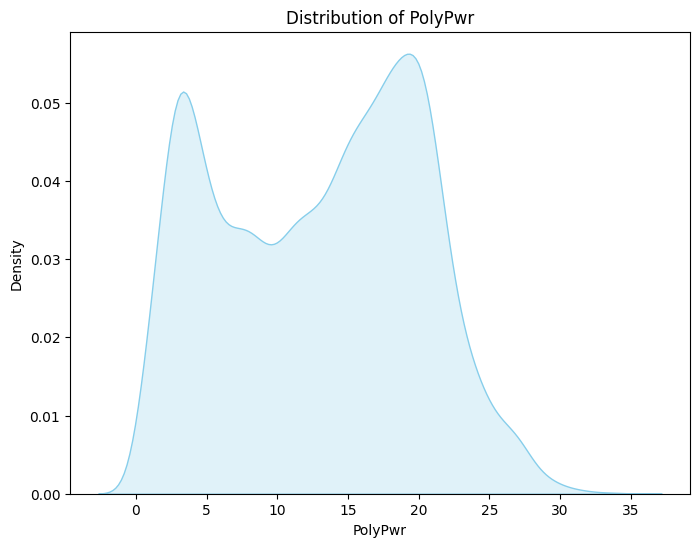

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

power_data = pd.read_csv('/kaggle/input/horizontal-photovoltaic-power-output-data/Photovoltaic Power Output Data.csv')

# Plot a kernel density plot for the 'PolyPwr' variable
plt.figure(figsize=(8, 6))
sns.kdeplot(power_data['PolyPwr'], fill=True, color='skyblue')
plt.title('Distribution of PolyPwr')
plt.xlabel('PolyPwr')
plt.ylabel('Density')
plt.show()

The kernel density plot above has two peaks and a trough in the middle. This represents a bimodal distribution. The distribution is bimodal because the data that was collected to predict the outcome of solar energy is largely natural phenomenon - humidity, ambient temperature, wind speed, atmospheric pressure, etc. There is inherent variation in such data that leads to bimodality

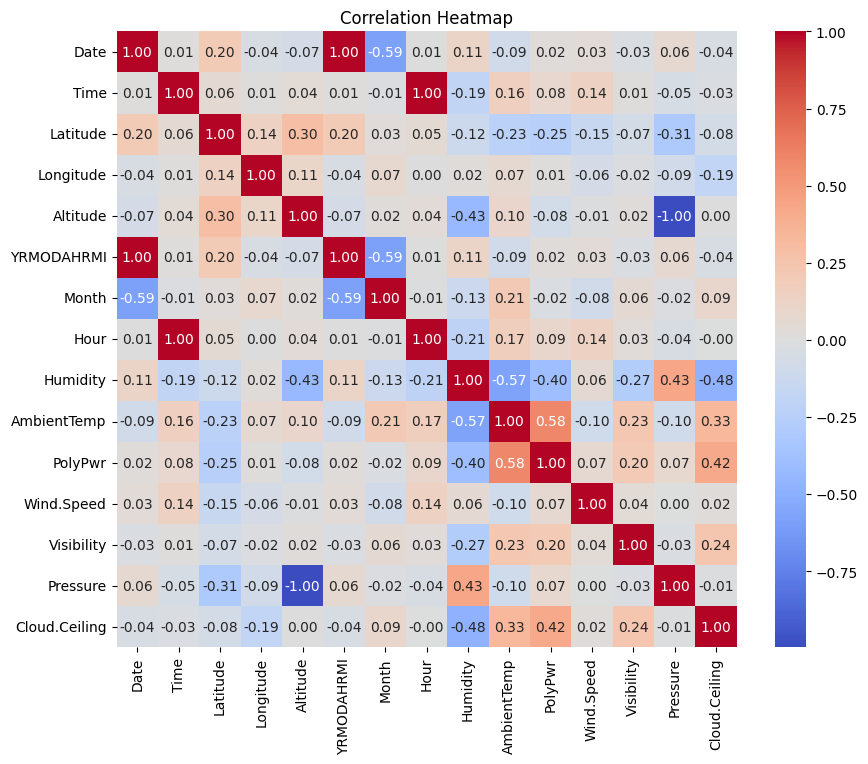

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
file_path = '/kaggle/input/horizontal-photovoltaic-power-output-data/Photovoltaic Power Output Data.csv'
df = pd.read_csv(file_path)

# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Part 3.0 Feature Engineering**

In this section, the following activities were performed:

3.1 One-hot encoding for location and season data

3.2 Feature Importance

3.3 Cyclic features for month and hour data

3.4 Selected features for modeling

**3.1 One-hot encoding**

In [9]:
# Perform one-hot encoding for the 'Location' and 'Season' columns, dropping the first binary column to avoid multicollinearity

df_with_location_en = pd.get_dummies(df, columns=['Location'], drop_first=True)

# df_with_season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

**3.2 Feature Importance**

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
file_path = '/kaggle/input/horizontal-photovoltaic-power-output-data/Photovoltaic Power Output Data.csv'
df = pd.read_csv(file_path)

# Step 2: Perform one-hot encoding for the 'Location' column
df = pd.get_dummies(df, columns=['Location'])

# Step 3: Perform one-hot encoding for the 'Season' column
df = pd.get_dummies(df, columns=['Season'])

# Step 4: Train a RandomForestRegressor for feature importance
X = df.drop(columns=['PolyPwr'])
y = df['PolyPwr']

model = RandomForestRegressor()
model.fit(X, y)

# Step 5: Compute and print feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                 Feature  Importance
9            AmbientTemp    0.404872
0                   Date    0.092558
13         Cloud.Ceiling    0.087607
8               Humidity    0.087143
12              Pressure    0.072567
1                   Time    0.051561
6                  Month    0.044944
10            Wind.Speed    0.038784
3              Longitude    0.020241
7                   Hour    0.018836
2               Latitude    0.018110
17         Location_JDMT    0.008614
5             YRMODAHRMI    0.008274
29         Season_Winter    0.007771
4               Altitude    0.005722
16   Location_Hill Weber    0.005376
27         Season_Spring    0.004962
25        Location_USAFA    0.003471
11            Visibility    0.003392
15      Location_Grissom    0.002458
22       Location_Offutt    0.001880
26           Season_Fall    0.001667
23     Location_Peterson    0.001532
28         Season_Summer    0.001526
18      Location_Kahului    0.001487
19        Location_MNANG    0.001255
1

Based on the provided results, here's the interpretation of the top features:

**Ambient Temperature**: It has the highest importance (40.6%) among all features. This suggests that ambient temperature significantly influences the power output.

**Date**: The date has substantial importance (9.1%). It implies that specific dates might have a consistent pattern in power output.

**Cloud Ceiling**: Cloud ceiling height (8.9%) is also crucial. It indicates that weather conditions, specifically cloud cover, play a significant role.

**Humidity**: Humidity (8.6%) is another weather-related feature with substantial importance.

**Pressure**: Atmospheric pressure (7.3%) influences power output as well.

**Time**: The time of day (5.1%) affects power generation, indicating diurnal patterns.

**Month**: Certain months (4.5%) might have a consistent impact on power output.

**Wind Speed**: Wind speed (3.8%) is a relevant factor, suggesting wind's influence on power generation.

**Geographical Coordinates (Latitude and Longitude)**: While not as important individually, their combination might indicate specific locations with varying power generation characteristics.

**Hour**: The specific hour of the day (1.9%) also contributes, indicating hourly patterns.

**Visibility**: Visibility conditions (0.3%) have a relatively lower impact but still play a role.

**Location (One-Hot Encoded)**: Different locations (each represented as a binary variable after one-hot encoding) have varying impacts, although individual locations have relatively low importance.

**Season (One-Hot Encoded)**: Different seasons (each represented as a binary variable after one-hot encoding) also contribute, with Winter having slightly higher importance.

**3.3 Cyclic features**

In [11]:
import pandas as pd
import numpy as np

# Load the dataset into a DataFrame
df = pd.read_csv('/kaggle/input/horizontal-photovoltaic-power-output-data/Photovoltaic Power Output Data.csv')

# Cyclically encode the 'Month' column (values ranging from 1 to 12)
max_month = 12  # Maximum month value
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / max_month)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / max_month)

# Cyclically encode the 'Hour' column (values ranging from 0 to 23)
max_hour = 24  # Maximum hour value
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / max_hour)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / max_hour)

**3.4 Selected features**

In [12]:
selected_features_modeling = ['Location', 'Date', 'Time', 'Latitude', 'Longitude', 'Altitude',
       'YRMODAHRMI', 'Month', 'Hour', 'Season', 'Humidity', 'AmbientTemp',
       'PolyPwr', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling',
       'Month_sin', 'Month_cos', 'Hour_sin', 'Hour_cos']

# Extract the selected features from the DataFrame
X_selected = df[selected_features_modeling]

# Assign y to the target variable (PolyPwr)
y = df['PolyPwr']



In [13]:
print(df.columns)

Index(['Location', 'Date', 'Time', 'Latitude', 'Longitude', 'Altitude',
       'YRMODAHRMI', 'Month', 'Hour', 'Season', 'Humidity', 'AmbientTemp',
       'PolyPwr', 'Wind.Speed', 'Visibility', 'Pressure', 'Cloud.Ceiling',
       'Month_sin', 'Month_cos', 'Hour_sin', 'Hour_cos'],
      dtype='object')


**4.0 Data Splitting**

In [14]:
from sklearn.model_selection import train_test_split

#Explicitly stating columns
selected_location_cols = ['Location_Grissom',
       'Location_Hill Weber', 'Location_JDMT', 'Location_Kahului',
       'Location_MNANG', 'Location_Malmstrom', 'Location_March AFB',
       'Location_Offutt', 'Location_Peterson', 'Location_Travis',
       'Location_USAFA']  
selected_season_cols = ['Season_Spring', 'Season_Summer','Season_Winter']  

# Select features and target variable
# X_selected = pd.concat([df_with_location_en[selected_location_cols], df_with_season_en[selected_season_cols]], axis=1)
X_selected = df[selected_features_modeling]
y = df['PolyPwr']

# Split the data into training and test sets (80% training and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Print a message indicating the data split
print("The entire dataset has been split into 80% training data and 20% test data.")


The entire dataset has been split into 80% training data and 20% test data.


In [15]:
print(X_selected)


          Location      Date  Time  Latitude  Longitude  Altitude  \
0      Camp Murray  20171203  1145     47.11    -122.57        84   
1      Camp Murray  20171203  1315     47.11    -122.57        84   
2      Camp Murray  20171203  1330     47.11    -122.57        84   
3      Camp Murray  20171204  1230     47.11    -122.57        84   
4      Camp Murray  20171204  1415     47.11    -122.57        84   
...            ...       ...   ...       ...        ...       ...   
21040        USAFA  20180928  1530     38.95    -104.83      1947   
21041        USAFA  20180929  1300     38.95    -104.83      1947   
21042        USAFA  20180929  1400     38.95    -104.83      1947   
21043        USAFA  20180929  1500     38.95    -104.83      1947   
21044        USAFA  20181001  1400     38.95    -104.83      1947   

         YRMODAHRMI  Month  Hour  Season  ...  AmbientTemp   PolyPwr  \
0      2.017120e+11     12    11  Winter  ...     12.86919   2.42769   
1      2.017120e+11     12 

**5.0 Data Modeling**

**5.1 Model Selection and Evaluation Process**

Various metrics were used to evaluate the model:

1. Mean Squared Error (MSE) measures the average of the squares of errors, which are the differences between actual and predicted values in a regression model

2. Root Mean Squared Error (RMSE): RMSE is the square root of the average of the squared errors. It represents the standard deviation of the residuals.

3. Mean Squared Logarithmic Error (MSLE): MSLE calculates the logarithm of the predicted and actual values, then computes the mean squared difference of the logarithms. It is useful when the target variable has exponential growth.

4. R-squared (R²): R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit.

5. Adjusted R-squared: Adjusted R-squared adjusts R-squared for the number of predictors in the model. It penalizes the addition of unnecessary predictors.

6. Mean Percentage Error (MPE): MPE calculates the percentage difference between predicted and actual values and then takes the average. It is useful for understanding the average prediction error as a percentage.

7. Mean Absolute Percentage Error (MAPE): Similar to MPE, MAPE calculates the percentage difference between predicted and actual values, but it uses absolute values, so it doesn't cancel out positive and negative errors.



The first model to experiment with is RandomForestRegressor and LinearRegression as the base models and the final prediction by ANSACRegressor, which supposedly should provide robust regression.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
import pandas as pd

# Read the CSV file into a Pandas DataFrame
file_path = '/kaggle/input/horizontal-photovoltaic-power-output-data/Photovoltaic Power Output Data.csv'
df = pd.read_csv(file_path)

df_with_location_en = pd.get_dummies(df, columns=['Location'], drop_first=True)

df_with_season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

# season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

selected_location_cols = ['Location_Grissom',
       'Location_Hill Weber', 'Location_JDMT', 'Location_Kahului',
       'Location_MNANG', 'Location_Malmstrom', 'Location_March AFB',
       'Location_Offutt', 'Location_Peterson', 'Location_Travis',
       'Location_USAFA']  
selected_season_cols = ['Season_Spring', 'Season_Summer','Season_Winter']

X_selected = pd.concat([df_with_location_en[selected_location_cols], df_with_season_en[selected_season_cols]], axis=1)
#X_selected = df[selected_features_modeling]
y = df['PolyPwr']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the base models for the stacking regressor
base_models = [
    ('random_forest', RandomForestRegressor()),
    ('linear_regression', LinearRegression())
]

# Create the stacking regressor
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=RANSACRegressor()
)

# Train the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = stacking_model.predict(X_test)

# Now, y_test contains the actual target values, and y_pred contains the predicted values


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Read the CSV file into a Pandas DataFrame
file_path = '/kaggle/input/horizontal-photovoltaic-power-output-data/Photovoltaic Power Output Data.csv'
df = pd.read_csv(file_path)

df_with_location_en = pd.get_dummies(df, columns=['Location'], drop_first=True)

df_with_season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

# season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

selected_location_cols = ['Location_Grissom',
       'Location_Hill Weber', 'Location_JDMT', 'Location_Kahului',
       'Location_MNANG', 'Location_Malmstrom', 'Location_March AFB',
       'Location_Offutt', 'Location_Peterson', 'Location_Travis',
       'Location_USAFA']  
selected_season_cols = ['Season_Spring', 'Season_Summer','Season_Winter']

X_selected = pd.concat([df_with_location_en[selected_location_cols], df_with_season_en[selected_season_cols]], axis=1)
#X_selected = df[selected_features_modeling]
y = df['PolyPwr']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the base models for the stacking regressor
base_models = [
    ('random_forest', RandomForestRegressor()),
    ('linear_regression', LinearRegression())
]

# Create the stacking regressor
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=RANSACRegressor()
)

# Train the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Generate predictions for the training set
y_train_pred = stacking_model.predict(X_train)

# Make predictions on the test data
y_test_pred = stacking_model.predict(X_test)

# Calculate Mean Squared Error for training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Root Mean Squared Error for training set
rmse_train = np.sqrt(mse_train)

# Calculate Mean Squared Error for test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error for test set
rmse_test = np.sqrt(mse_test)

# Print the results
print("Training Set Mean Squared Error:", mse_train)
print("Training Set Root Mean Squared Error (RMSE):", rmse_train)
print("Test Set Mean Squared Error:", mse_test)
print("Test Set Root Mean Squared Error (RMSE):", rmse_test)

Training Set Mean Squared Error: 38.7448210372065
Training Set Root Mean Squared Error (RMSE): 6.224533800792353
Test Set Mean Squared Error: 40.617220251135876
Test Set Root Mean Squared Error (RMSE): 6.37316406905831


In [18]:
# Calculate the range of PolyPwr
poly_pwr_range = df['PolyPwr'].max() - df['PolyPwr'].min()

print("Range of PolyPwr:", poly_pwr_range)

Range of PolyPwr: 34.02769


In [19]:
# Given values
mse = 45.84
polyPwr_range = 34.02769

# Calculate MSE-to-Range Ratio
mse_to_range_ratio = mse / (polyPwr_range ** 2)

print("MSE-to-Range Ratio:", mse_to_range_ratio)

MSE-to-Range Ratio: 0.03958946872221343


In [20]:
import pandas as pd
import numpy as np

# Load the CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/horizontal-photovoltaic-power-output-data/Photovoltaic Power Output Data.csv')

# Assuming 'PolyPwr' is the column representing solar output data
solar_output_data = df['PolyPwr']

# Calculate the standard deviation
standard_deviation = np.std(solar_output_data)

# Print the standard deviation (in this case, it represents the inherent variability)
print("Standard Deviation (Inherent Variability) of Solar Output (PolyPwr):", standard_deviation)

Standard Deviation (Inherent Variability) of Solar Output (PolyPwr): 7.123086188983707


In [21]:
# Given values
mse = 45.83939072138666
standard_deviation = 7.123086188983707

# Calculate the ratio of MSE to standard deviation
mse_to_std_dev_ratio = mse / standard_deviation

print("MSE to Standard Deviation Ratio:", mse_to_std_dev_ratio)

MSE to Standard Deviation Ratio: 6.435327259170346


MSE to Range Ratio: The score of 0.0396 indicates that the prediction error is relatively small compared to the entire range of the target variable. It suggests that the model's predictions are distributed evenly across the entire range of possible values.

MSE to Standard Deviation Ratio: The score of approximately 6.44 suggests that the prediction error is relatively large compared to the natural variability (standard deviation) of the target variable. It indicates that the model's predictions are not accurate when considering the inherent noise or fluctuations in the data.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
import pandas as pd

def mean_percentage_error(y_true, y_pred):
    errors = []
    for actual, predicted in zip(y_true, y_pred):
        if actual != 0:
            errors.append((actual - predicted) / actual)
    return sum(errors) / len(errors) * 100

# Read the CSV file into a Pandas DataFrame
file_path = '/kaggle/input/horizontal-photovoltaic-power-output-data/Photovoltaic Power Output Data.csv'
df = pd.read_csv(file_path)

df_with_location_en = pd.get_dummies(df, columns=['Location'], drop_first=True)

df_with_season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

# season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

selected_location_cols = ['Location_Grissom',
       'Location_Hill Weber', 'Location_JDMT', 'Location_Kahului',
       'Location_MNANG', 'Location_Malmstrom', 'Location_March AFB',
       'Location_Offutt', 'Location_Peterson', 'Location_Travis',
       'Location_USAFA']  
selected_season_cols = ['Season_Spring', 'Season_Summer','Season_Winter']

X_selected = pd.concat([df_with_location_en[selected_location_cols], df_with_season_en[selected_season_cols]], axis=1)
y = df['PolyPwr']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Giving X_train, X_test, y_train, y_test as the training and test data
base_models = [
    ('random_forest', RandomForestRegressor()),
    ('linear_regression', LinearRegression())
]

stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=RANSACRegressor()
)

stacking_model.fit(X_train, y_train)

# Make predictions
predictions = stacking_model.predict(X_test)

# Evaluate the model
mpe = mean_percentage_error(y_test, predictions)

print("Mean Percentage Error (MPE):", mpe)

Mean Percentage Error (MPE): -125.11680541553596


A mean percentage error (MPE) of approximately -78.00% indicates that, on average, your predictions are about 78% below the actual values. A negative MPE suggests that your predictions are systematically underestimating the actual values. In other words, your model is predicting values that are much lower than the true values.

**6.0 Hyperparameter Tuning**

In [23]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Read the CSV file into a Pandas DataFrame
file_path = '/kaggle/input/horizontal-photovoltaic-power-output-data/Photovoltaic Power Output Data.csv'
df = pd.read_csv(file_path)

df_with_location_en = pd.get_dummies(df, columns=['Location'], drop_first=True)

df_with_season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

# season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

selected_location_cols = ['Location_Grissom',
       'Location_Hill Weber', 'Location_JDMT', 'Location_Kahului',
       'Location_MNANG', 'Location_Malmstrom', 'Location_March AFB',
       'Location_Offutt', 'Location_Peterson', 'Location_Travis',
       'Location_USAFA']  
selected_season_cols = ['Season_Spring', 'Season_Summer','Season_Winter']

X_selected = pd.concat([df_with_location_en[selected_location_cols], df_with_season_en[selected_season_cols]], axis=1)
y = df['PolyPwr']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for Random Forest Regressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor instance
rf = RandomForestRegressor()

# Perform Grid Search with 5-fold cross-validation and mean squared error as the scoring metric
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model from grid search
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters found
print("Best Hyperparameters:", best_params)

# Make predictions using the best model
predictions = best_model.predict(X_test)

# Calculate Mean Percentage Error (MPE)
def mean_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) / y_true) * 100

# Calculate MPE for the predictions
mpe = mean_percentage_error(y_test, predictions)

# Print Mean Percentage Error
print("Mean Percentage Error (MPE):", mpe)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_

**7.0 Validation and Cross-Validation**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

# Read the CSV file into a Pandas DataFrame
file_path = '/kaggle/input/horizontal-photovoltaic-power-output-data/Photovoltaic Power Output Data.csv'
df = pd.read_csv(file_path)

df_with_location_en = pd.get_dummies(df, columns=['Location'], drop_first=True)

df_with_season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

# season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

selected_location_cols = ['Location_Grissom',
       'Location_Hill Weber', 'Location_JDMT', 'Location_Kahului',
       'Location_MNANG', 'Location_Malmstrom', 'Location_March AFB',
       'Location_Offutt', 'Location_Peterson', 'Location_Travis',
       'Location_USAFA']  
selected_season_cols = ['Season_Spring', 'Season_Summer','Season_Winter']

X_selected = pd.concat([df_with_location_en[selected_location_cols], df_with_season_en[selected_season_cols]], axis=1)
y = df['PolyPwr']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Further split training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Define your model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_selected, y, cv=5, scoring='neg_mean_squared_error')

# Calculate mean RMSE
mean_rmse = np.sqrt(-cv_scores.mean())
print("Mean RMSE from 5-fold Cross-Validation:", mean_rmse)

Mean RMSE from 5-fold Cross-Validation: 6.786600692724665


A mean RMSE of 6.79 from 5-fold cross-validation suggests that the model's performance is consistent across different subsets of the data. This result gives more confidence in the model's ability to generalize to unseen data

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the RandomForestRegressor with specific hyperparameters
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with your training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate mean squared error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Now you can also make predictions on X_selected
# Assuming X_selected are the features for which you want to make predictions
predictions_selected = model.predict(X_selected)

Mean Squared Error (MSE): 36.71671276094324


In [26]:
import numpy as np

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 6.0594317193069545


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def mean_percentage_error(y_true, y_pred):
    errors = []
    for actual, predicted in zip(y_true, y_pred):
        if actual != 0:
            errors.append((actual - predicted) / actual)
    return sum(errors) / len(errors) * 100

# Instantiate the random forest regressor with the best hyperparameters
best_random_forest = RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42)

# Train the model using the entire training dataset
best_random_forest.fit(X_train, y_train)

# Make predictions on the test dataset
predictions = best_random_forest.predict(X_test)

# Evaluate the model using metrics like MSE, RMSE, MPE, etc.
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mpe = mean_percentage_error(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Percentage Error (MPE):", mpe)


Mean Squared Error (MSE): 36.71685798575549
Root Mean Squared Error (RMSE): 6.0594437026640895
Mean Percentage Error (MPE): -80.84021555918075


The MPE is -80.84%, indicating that, on average, the model's predictions are about 80.84% below the actual values. While the RMSE is 6.06, meaning, on average, the predictions deviate from the actual values by approximately 6.06 units.



In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split  # Import train_test_split function
import pandas as pd

# Read the CSV file into a Pandas DataFrame
file_path = '/kaggle/input/horizontal-photovoltaic-power-output-data/Photovoltaic Power Output Data.csv'
df = pd.read_csv(file_path)

df_with_location_en = pd.get_dummies(df, columns=['Location'], drop_first=True)

df_with_season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

# season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

selected_location_cols = ['Location_Grissom',
       'Location_Hill Weber', 'Location_JDMT', 'Location_Kahului',
       'Location_MNANG', 'Location_Malmstrom', 'Location_March AFB',
       'Location_Offutt', 'Location_Peterson', 'Location_Travis',
       'Location_USAFA']  
selected_season_cols = ['Season_Spring', 'Season_Summer','Season_Winter']

X_selected = pd.concat([df_with_location_en[selected_location_cols], df_with_season_en[selected_season_cols]], axis=1)
y = df['PolyPwr']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Instantiate the random forest regressor with the best hyperparameters
best_random_forest = RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42)

# Train the model using the entire training dataset
best_random_forest.fit(X_train, y_train)

# Save the trained model to a file
import joblib

joblib.dump(best_random_forest, 'trained_model.pkl')  # Save the model to a file

# Load the trained model
loaded_model = joblib.load('trained_model.pkl')  # Load the model from the file

# Make predictions on the test dataset
predictions = loaded_model.predict(X_test)

print(predictions)

[13.56168496 13.56168496 14.28830145 ... 13.86529255 18.0439788
 15.24464212]


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import numpy as np
import pandas as pd

# Read the CSV file into a Pandas DataFrame
file_path = '/kaggle/input/horizontal-photovoltaic-power-output-data/Photovoltaic Power Output Data.csv'
df = pd.read_csv(file_path)

df_with_location_en = pd.get_dummies(df, columns=['Location'], drop_first=True)

df_with_season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

# season_en = pd.get_dummies(df_with_location_en, columns=['Season'], drop_first=True)

selected_location_cols = ['Location_Grissom',
       'Location_Hill Weber', 'Location_JDMT', 'Location_Kahului',
       'Location_MNANG', 'Location_Malmstrom', 'Location_March AFB',
       'Location_Offutt', 'Location_Peterson', 'Location_Travis',
       'Location_USAFA']  
selected_season_cols = ['Season_Spring', 'Season_Summer','Season_Winter']

# Features and target variable
X_selected = pd.concat([df_with_location_en[selected_location_cols], df_with_season_en[selected_season_cols]], axis=1)
y = df['PolyPwr']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Instantiate the random forest regressor with the best hyperparameters
best_random_forest = RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200, random_state=42)

# Train the model using the entire training dataset
best_random_forest.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(best_random_forest, 'trained_model.pkl')  # Save the model to a file

# Load the trained model
loaded_model = joblib.load('trained_model.pkl')  # Load the model from the file

# Make predictions on the test dataset
predictions = loaded_model.predict(X_test)

# Compare Y_Predicted to y_test
print(predictions)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

[13.56168496 13.56168496 14.28830145 ... 13.86529255 18.0439788
 15.24464212]
Mean Squared Error: 36.701080028101615
Root Mean Squared Error: 6.058141631565047
R-squared: 0.27754501263330145


Predictions: The array [13.56168496, 13.56168496, 14.28830145, ..., 13.86529255, 18.0439788, 15.24464212] represents the predicted power outputs for the corresponding samples in the test set.

Mean Squared Error (MSE): MSE is a measure of the average squared difference between the actual and predicted values. In this case, it's approximately 36.70. Lower MSE values indicate better performance, so your model's predictions have some room for improvement.

Root Mean Squared Error (RMSE): RMSE is the square root of the MSE and gives an interpretable value in the original units of the target variable. The RMSE is approximately 6.06. Lower RMSE values indicate better fit.

R-squared (R²): R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, and higher values indicate a better fit of the model to the data. The R-squared value is approximately 0.28, suggesting that the model explains about 28% of the variance in the data.

**References**

(1) [Investment Migration Climate Resilience Index - Henley & Partners](http://www.henleyglobal.com/publications/investment-migration-climate-resilience-index)

(2) [Climate Resilience of African Countries in 2022](https://cdn.statcdn.com/Infographic/images/normal/28136.jpeg)

(3) [M-Kopa Solar Brightens Off Grid Solar Market](https://www.safaricom.co.ke/media-center-landing/press-releases/m-kopa-solar-brightens-off-grid-solar-market#:~:text=M%2DKOPA%20Solar%20currently%20offers,50%20(inclusive%20of%20VAT))

(4) [What Factors Affect Solar PV System Efficiency](https://www.eco-greenenergy.com/what-factors-affect-solar-pv-system-efficiency/)

(5) [Solar explained - Photovoltaics and electricity](https://www.eia.gov/energyexplained/solar/photovoltaics-and-electricity.php#:~:text=PV%20panels%20vary%20in%20size,surface%20area%20of%20the%20panel.)

(6) [Reviewing the External Factors that Influence PV Output Performance in the Irish Climate](https://arrow.tudublin.ie/cgi/viewcontent.cgi?article=1015&context=archastrocon#:~:text=PV%20module%20output%20varies%20with,of%20timescales%20and%2For%20reversible.) 

(7) [Why is calculating the annual yield from your solar panels important?](https://www.exeoenergy.co.uk/solar-panels/solar-panel-output#:~:text=to%20be%20significant.-,Why%20is%20calculating%20the%20annual%20yield%20from%20your%20solar%20panels%20important%3F,-There%20are%20a)

(8) [What factors affect the annual yield from a solar panel system?](https://www.exeoenergy.co.uk/solar-panels/solar-panel-output#:~:text=the%20system%20performance-,What%20factors%20affect%20the%20annual%20yield%20from%20a%20solar%20panel%20system%3F,-There%20are%20a)

(9) [Williams, Jada; Wagner, Torrey (2019), “Northern Hemisphere Horizontal Photovoltaic Power Output Data for 12 Sites”, Mendeley Data, V5, doi: 10.17632/hfhwmn8w24.5](https://data.mendeley.com/datasets/hfhwmn8w24/5)




